In [26]:
# Build this a code along to the following video:
    # https://www.youtube.com/watch?v=sDv4f4s2SB8

import numpy as np
import matplotlib.pyplot as plt

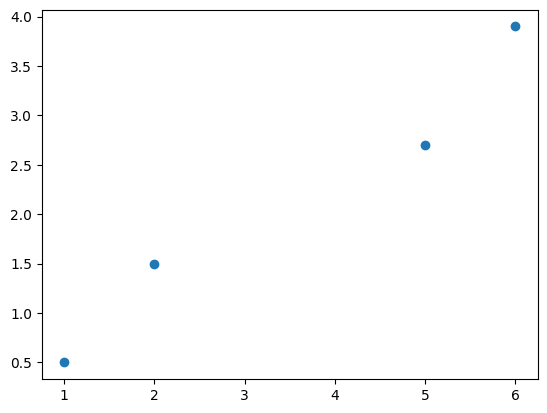

In [27]:
# The Optimization Problem:
# Linear Regression:
x = [1, 2, 5, 6]
y = [.5, 1.5, 2.7, 3.9]
plt.scatter(x,y)

In [28]:
# MSE as our loss function: sum((y_pred-y_true)**2)
# As a function across all our single predictions:
def mse_loss(alpha, beta) -> float:
    return (
        ((alpha + 1*beta)-.5)**2 + 
        ((alpha + 2*beta)-1.5)**2 + 
        ((alpha + 5*beta)-2.7)**2 + 
        ((alpha + 6*beta)-3.9)**2
    )

mse_loss(0, 1)

10.2

In [29]:
# Gradient/Derivatives of the formula - Now we need partial derivatives and the chain rule 
# d/d_alpha
def mse_loss_d_alpha(alpha, beta) -> float:
    return (
        2*((alpha + 1*beta)-.5) + 
        2*((alpha + 2*beta)-1.5) + 
        2*((alpha + 5*beta)-2.7) + 
        2*((alpha + 6*beta)-3.9)
    )
    
# d/d_beta
def mse_loss_d_beta(alpha, beta) -> float:
    return (
        2*((alpha + 1*beta)-.5) + 
        4*((alpha + 2*beta)-1.5) + 
        10*((alpha + 5*beta)-2.7) + 
        12*((alpha + 6*beta)-3.9)
    )
    
def gradient_function(
    alpha, beta
) -> list:
    gradient_alpha = mse_loss_d_alpha(alpha, beta)
    gradient_beta = mse_loss_d_beta(alpha, beta)
    return [gradient_alpha, gradient_beta]

In [84]:
class GradientDescent:
    def __init__(
        self,
        learning_rate=.1,
        max_iter=100,
        tolerance=1e-3
    ):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.history = []
        
    def optimize(
        self,
        initial_params,
        loss_function,
        gradient_function
    ):
        current_params = initial_params
        self.history = [current_params]
        losses = [
            loss_function(*current_params)
        ]
        #Main Loop
        for i in range(self.max_iter):
            # Also called slope
            gradients = gradient_function(*current_params)
            # The famous step
            new_params = [p-self.learning_rate*gradients[i] for i, p in enumerate(current_params)]
            # Storing values
            self.history.append(new_params)
            losses.append(loss_function(*new_params))
            # Check for convergance:
            if np.abs(
                sum(
                    [new_params[i] - current_params[i] for i in range(len(new_params))]
                )
            ) < self.tolerance:
                print(f"Converged after {i+1} iterations!")
                break
                
            current_params = new_params
        
        return current_params, losses

In [85]:
gd_optimizer = GradientDescent(learning_rate=.01, max_iter=500)

optimal_point, loss_hist = gd_optimizer.optimize(
    [5,-1], 
    mse_loss, 
    gradient_function
)

Converged after 221 iterations!


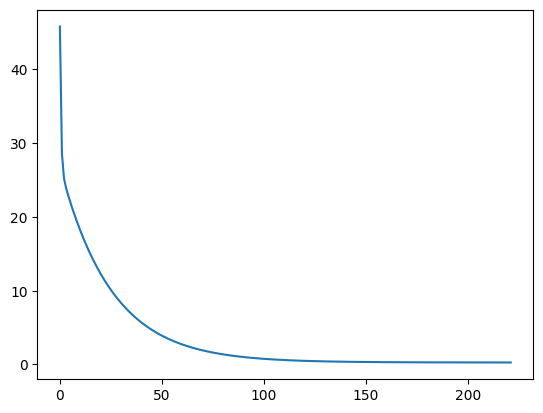

In [88]:
plt.plot(
    [i for i in range(len(loss_hist))],
    loss_hist
)

In [95]:
from IPython.display import display, clear_output

fig, ax = plt.subplots()
for i, (alpha, beta) in enumerate(gd_optimizer.history):
    ax.cla()
    ax.set_xlim(0,7)
    ax.set_ylim(0,6)
    ax.scatter(x,y)
    line = ax.plot(
        np.linspace(0, 7, 71),
        [alpha + beta*val for val in np.linspace(0, 7, 71)]
    )
    clear_output(wait=True)
    display(fig) 
    plt.pause(0.5/(i+1))

KeyboardInterrupt: 